### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/TreeExplainer">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Mount with google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
!git clone 'http://github.com/Nak007/TreeExplainer.git'

In [1]:
import pandas as pd, numpy as np, sys
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.4f}'.format

# scikit-learn library
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import (make_classification, make_regression)

sys.path.append('/content/TreeExplainer')
from TreeExplainer import *

### <font color="green" size=5> Make classification data </font>

Generate a random n-class classification problem. [Reference](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

In [2]:
X0, y0 = make_classification(n_samples     = 10000, 
                             n_features    = 20, 
                             n_informative = 20, 
                             n_redundant   = 0, 
                             random_state  = 99, 
                             shuffle       = True, 
                             n_classes     = 2, 
                             weights       = [0.7,0.3])

X0 = pd.DataFrame(X0, columns=["feature_" + str(n).zfill(2) 
                               for n in range(1,X0.shape[1]+1)]) 

### <font color="green" size=5> Train classifier </font>

In [3]:
clf = RandomForestClassifier(**{"random_state": 0, 
                                "n_estimators": 50, 
                                "n_jobs"      : -1, 
                                "max_depth"   : 10, 
                                "max_features": "sqrt"}).fit(X0, y0)

We will use **`TreeExplainer`** to observe the relationship between feature contributions and variables. This type of visualization will facilitate an understanding of which features are important for the classification.

In [4]:
clf_explain = TreeExplainer(clf).fit(X0, y0)

Feature name: feature_02


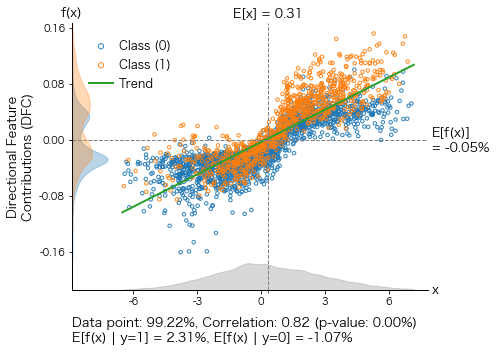

In [15]:
var = np.random.choice(list(X0))
print(f"Feature name: {var}")
ax  = clf_explain.scatter(var, frac=0.3, by_class=False)

Directional feature contribution can be seen as an average incremental increase/decrease probability from bias. The scatter plot **`scatter()`** illustrates the relationship between $x$ and Directional Feature Contribution towards better understanding of how change in $x$ affects the prediction. The trend line is just a linear approximation and shall not be considered as a true relationship.

Feature name: feature_02


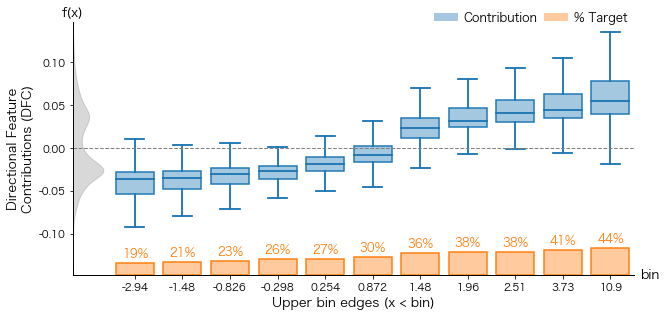

In [16]:
print(f"Feature name: {var}")
ax = clf_explain.boxplot(var)

In box plot **`boxplot()`**, Multi-Interval Discretization (modified) is applied to divide $x$ into bins towards monotonic trend (increase/decrease) of percentage of targets. This introduces a linear relationship between directional feature contribution and target, and enables us to understand in the most simplest way.

index: 8118


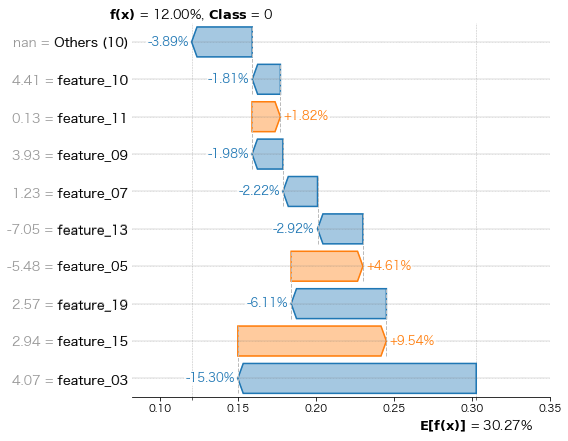

In [18]:
index = np.random.randint(len(X0))
print(f"index: {index}")
ax = clf_explain.waterfall(index=index, sort_by="contribution")

The prediction function can be expressed as $f(x) = \frac{1}{J}\sum_{j=1}^{J} c_{j} + \sum_{k=1}^{K} (\frac{1}{J}\sum_{j=1}^{J} contrib_{j}(x,k))$ where $J$ is the number of trees in the forest, $K$ is the number of features, $c_{j}$ is the value at the root of the node of $j^{th}$ tree (bias), and $contrib(x,k)$ is the contribution from the $k^{th}$ feature in the feature vector $x$. From the equation, Directional Feature Contributions, **DFC** always sum up to the difference between the average value at every root node and prediction. The simplest way to see this is through a waterfall plot **`waterfall()`** that starts from an average value of root nodes, and then adds contribution features one at a time until we reach the prediction.

### <font color="green" size=5> Make regression data </font>

In [19]:
X1, y1, _ = make_regression(n_samples    = 1000, 
                            n_features   = 15, 
                            coef         = True, 
                            random_state = 1, 
                            bias         = 3.5)

X1 = pd.DataFrame(X1, columns=["feature_" + str(n).zfill(2) 
                               for n in range(1,X1.shape[1]+1)]) 

### <font color="green" size=5> Train regressor </font>

In [20]:
reg = RandomForestRegressor(**{"random_state": 0, 
                               "n_estimators": 50, 
                               "n_jobs"      : -1, 
                               "max_depth"   : 10, 
                               "max_features": "sqrt"}).fit(X1, y1)

In [21]:
reg_explain = TreeExplainer(reg).fit(X1, y1)

Feature name: feature_14


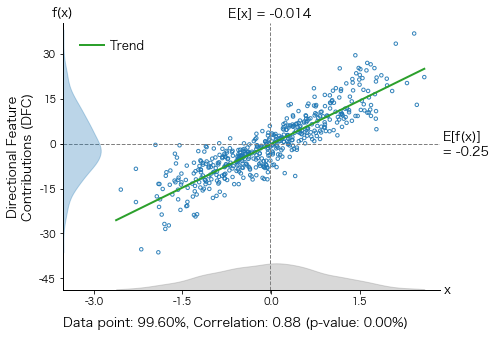

In [26]:
var = np.random.choice(list(X1))
print(f"Feature name: {var}")
ax  = reg_explain.scatter(var, frac=0.5, by_class=True)

Feature name: feature_14


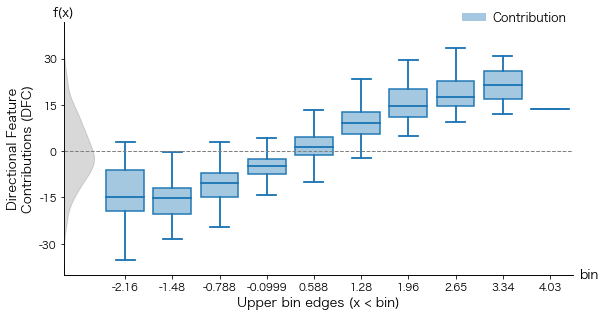

In [27]:
print(f"Feature name: {var}")
ax = reg_explain.boxplot(var)

index: 240


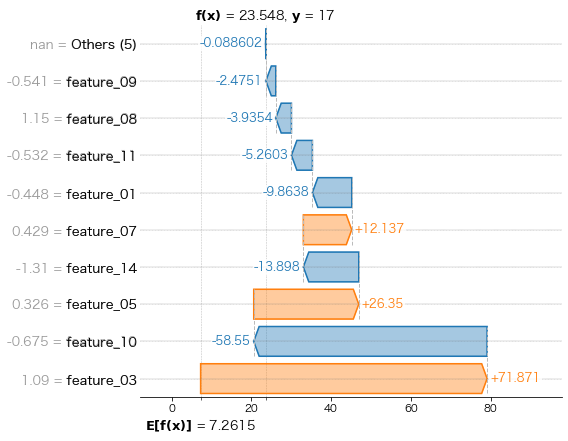

In [32]:
index = np.random.randint(len(X1))
print(f"index: {index}")
ax = reg_explain.waterfall(index=index, sort_by="contribution")